This jupyter notebook was put together in to get to better know the product line of the company **Leapfrog Global**. All information was personally scraped from the website https://leapfroglobal.com/ on date **21/12/2022**.

The information was scraped using the BeautifulSoup Library, and the codebase is included in the Github. As there was no way to scrape the categorical information from the main website, this notebook will be mainly a study in 

* The current line of products that Leapfrog Global has based on the website information
* Website design of the main Products page of the Leapfrog Global 

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('leapfrog.csv', index_col = 0)
data.index.name = None

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, Armaggeddon AK-666 to SCARLET SABER 120MM LED FAN
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price_info  479 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB


The data prepared had scraped 479 items off the Leapfrog Global website, pulling price information of product lines across all its brands. Below we show the first 10 entries based of the csv file was was scraped.

In [3]:
data.head(10)

,price_info
Armaggeddon AK-666,SGD24.90
Thunderbolt | 5600G,SGD999.00
26 ASSAULT AS-33H,SGD9.90
27 AS-33R,Out Of Stock
28 AS-29R,SGD19.90
AERO III Black,SGD59.90
AERO VII Black,SGD69.90
AIR SHARK 2.4G,SGD9.90
AIRBAND 3,SGD19.90
Airmouse,SGD6.90


At the time of scraping, there were items that were listed on the website but were shown to be out of stock. 

The html tags for these items did not have any price information

Below are the items that were out of stock at time of scraping

In [4]:
print(data.loc[data["price_info"] == "Out Of Stock"])

                                                      price_info
27 AS-33R                                           Out Of Stock
Airmouse LFX Silent                                 Out Of Stock
Armaggeddon Pixxel+ Xtreme XF27HD SS                Out Of Stock
Armaggeddon Pixxel+ Xtreme XF27HD Super             Out Of Stock
BBX 500 TWS                                         Out Of Stock
BBX 800 TWS                                         Out Of Stock
Elysium IRON Mini                                   Out Of Stock
EVO 7 PRO BTMI                                      Out Of Stock
Hagane H-7                                          Out Of Stock
Inno3d Geforce RTX 3060 Ichill Red X 3              Out Of Stock
Inno3d Geforce RTX 3070 Twin X 2 OC LHR             Out Of Stock
INNO3D GEFORCE RTX 3090 GAMING X3                   Out Of Stock
MKA 2C                                              Out Of Stock
MKA-17 Avenger                                      Out Of Stock
NEOPLUG NOZZ             

In [5]:
print(data.loc[data['price_info'] == "Out Of Stock"].value_counts())

price_info  
Out Of Stock    44
dtype: int64


At time of scraping, there were also entries on the website that seemed to be erroneous, where there was 

* no price data
* no graphical information of the product
* no indication of out of stock 
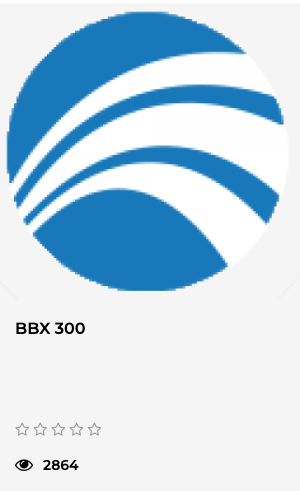


In [6]:
data.loc[data['price_info'] == "Missing Data"].value_counts()

price_info  
Missing Data    2
dtype: int64

In total, there are :
* 2 erroneous entries 
* 44 out of stock items 

As this translates to less than 10% of total items scraped, we can now move towards removing these entries from the dataset

In [7]:
cleaned_data = data[(data['price_info'] != "Missing Data") \
                    & (data['price_info'] != "Out Of Stock")]

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, Armaggeddon AK-666 to SCARLET DUAL SABER
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price_info  433 non-null    object
dtypes: object(1)
memory usage: 6.8+ KB


After checking the information for cleaned data that shows there are now 433 items, we can confirm that we have removed a total of 46 entries from the initial 479 items scraped.

To be able to work through the rest of the information, the datatype of the price_info column has to be converted into a numerical value we can use for comparisons

In [9]:
cleaned_data["price_info"].unique()

array(['SGD24.90', 'SGD999.00', 'SGD9.90', 'SGD19.90', 'SGD59.90',
       'SGD69.90', 'SGD6.90', 'SGD8.90', 'SGD22.90', 'SGD29.90',
       'SGD44.90', 'SGD16.90', 'SGD39.90', 'SGD49.90', 'SGD99.90',
       'SGD5.90', 'SGD1.80', 'SGD2.90', 'SGD13.90', 'SGD1,99', 'SGD1,92',
       'SGD2,10', 'SGD2,21', 'SGD2,99', 'SGD2,39', 'SGD109.00',
       'SGD25.00', 'SGD189.00', 'SGD79.90', 'SGD12.90', 'SGD14.90',
       'SGD29.00', 'SGD8.00', 'SGD30.00', 'SGD199.00', 'SGD129.90',
       'SGD99.00', 'SGD1,07', 'SGD1,21', 'SGD32.90', 'SGD47.90',
       'SGD20.90', 'SGD35.00', 'SGD55.00', 'SGD249.00', 'SGD3,77',
       'SGD149.00', 'SGD219.00', 'SGD289.00', 'SGD599.00', 'SGD1,05',
       'SGD1,70', 'SGD1,68', 'SGD2,15', 'SGD70.00', 'SGD15.00',
       'SGD89.90', 'SGD339.00', 'SGD16.00', 'SGD1,16', 'SGD1,37',
       'SGD679.00', 'SGD149.90', 'SGD799.90', 'SGD45.00', 'SGD40.00',
       'SGD139.00', 'SGD279.00', 'SGD269.00', 'SGD299.00', 'SGD369.00',
       'SGD20.00', 'SGD23.90', 'SGD259.00', 'SGD89.00

In [10]:
cleaned_data[(cleaned_data["price_info"] == "SGD1,37") \
            |(cleaned_data["price_info"] == "SGD1,99")]

,price_info
Aqua Hue AMD | 5600X - 3080,"SGD1,99"
Aqua Hue Intel | 12600KF - 3080,"SGD1,99"
Nimbus Pro Intel | 12400F - 3060,"SGD1,37"


The prices of the items we see where price was scraped as the string *"SGD(x),(x)(x)"* are as follows (taking a sample of all the unique values that were found in the price_info column afer cleaning 

as per website :
* Aqua Hue AMD | 5600X - 3080 - **SGD1,999.00** (recorded from scrape as SGD1,99)
* Aqua Hue Intel | 12600KF - 3080 - **SGD1,999.00** (recorded from scrape as SGD1,99)
* Nimbus Pro Intel | 12400F - 3060 - **SGD1,379.00** (recorded from scrape as SGD1,37)

We can thus ascertain that for price data that has been scraped that contains a **","** , what we should be doing is removing the comma, and then adding a 9 behind the numerical value to get the actual list price of the item

In [11]:
cleaned_price = [] #data structure to hold cleaned price data
for price in cleaned_data['price_info']:
    if "," in price: 
        #if "," is in the entry, this is one of the entries that is over value 1,000
        #price is to be cleaned as detailed above, then SGD to be removed, whitespace to be removed and typecast to
        #float
        price = price.strip()
        price = price.replace(',', '')
        price = price + "9"
        price = price.replace("SGD", "")
        cleaned_price.append(float(price))
    else: 
        # if not, it is a normal price entry, then procedure is to only clean whitespace, remove the SGD and typecast
        # float (numerical value)
        price = price.strip()
        price = price.replace("SGD", "")
        cleaned_price.append(float(price))
        

The code block above goes through all the price data in the dataset **cleaned_data** and cleans it according to the comments in the codeblock, storing all the cleaned data first in the cleaned_price list to await transferring over and overwriting the previous price data in the cleaned_data dataset

To confirm that we have gotten price data to be cleaned and lined up properly, first we inspect the top 5 and bottom 5 entries of price data before replacing with cleaned price

# PRICE DATA BEFORE - TOP AND BOTTOM 5 ENTRIES 

In [12]:
cleaned_data.head()

,price_info
Armaggeddon AK-666,SGD24.90
Thunderbolt | 5600G,SGD999.00
26 ASSAULT AS-33H,SGD9.90
28 AS-29R,SGD19.90
AERO III Black,SGD59.90


In [13]:
cleaned_data.tail()

,price_info
Asic 7 RGB FX,SGD6.90
AZURE DUAL SABER,SGD13.90
JADE DUAL SABER,SGD13.90
SCARLET BLADE,SGD9.90
SCARLET DUAL SABER,SGD13.90


# PRICE AFTER CLEANING - TOP AND BOTTOM 5 ENTRIES

In [14]:
cleaned_data["price_info"] = cleaned_price
cleaned_data.head()

/var/folders/pq/6k_969mj2vz2_1xd9b8z0wr00000gn/T/ipykernel_49426/1833700874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["price_info"] = cleaned_price


,price_info
Armaggeddon AK-666,24.9
Thunderbolt | 5600G,999.0
26 ASSAULT AS-33H,9.9
28 AS-29R,19.9
AERO III Black,59.9


In [15]:
cleaned_data.tail()

,price_info
Asic 7 RGB FX,6.9
AZURE DUAL SABER,13.9
JADE DUAL SABER,13.9
SCARLET BLADE,9.9
SCARLET DUAL SABER,13.9


We can ascertain from looking through the top and bottom 5 rows of the data both before and after the price information has been cleaned that the price info has transferred properly in line 

We should now also check through some of the previous items that has commas in them, to ensure that those have been converted properly.

**BEFORE**

array(['SGD24.90', 'SGD999.00', 'SGD9.90', 'SGD19.90', 'SGD59.90',
       'SGD69.90', 'SGD6.90', 'SGD8.90', 'SGD22.90', 'SGD29.90',
       'SGD44.90', 'SGD16.90', 'SGD39.90', 'SGD49.90', 'SGD99.90',
       'SGD5.90', 'SGD1.80', 'SGD2.90', 'SGD13.90', 'SGD1,99', 'SGD1,92',
       'SGD2,10', 'SGD2,21', 'SGD2,99', 'SGD2,39', 'SGD109.00',
       'SGD25.00', 'SGD189.00', 'SGD79.90', 'SGD12.90', 'SGD14.90',
       'SGD29.00', 'SGD8.00', 'SGD30.00', 'SGD199.00', 'SGD129.90',
       'SGD99.00', 'SGD1,07', 'SGD1,21', 'SGD32.90', 'SGD47.90',
       'SGD20.90', 'SGD35.00', 'SGD55.00', 'SGD249.00', 'SGD3,77',
       'SGD149.00', 'SGD219.00', 'SGD289.00', 'SGD599.00', 'SGD1,05',
       'SGD1,70', 'SGD1,68', 'SGD2,15', 'SGD70.00', 'SGD15.00',
       'SGD89.90', 'SGD339.00', 'SGD16.00', 'SGD1,16', 'SGD1,37',
       'SGD679.00', 'SGD149.90', 'SGD799.90', 'SGD45.00', 'SGD40.00',
       'SGD139.00', 'SGD279.00', 'SGD269.00', 'SGD299.00', 'SGD369.00',
       'SGD20.00', 'SGD23.90', 'SGD259.00', 'SGD89.00', 'SGD129.00',
       'SGD28.90', 'SGD34.90', 'SGD18.90', 'SGD1,09', 'SGD1,76',
       'SGD1,71', 'SGD1,32', 'SGD1,57', 'SGD18.00', 'SGD19.00',
       'SGD229.00', 'SGD139.90', 'SGD169.90', 'SGD22.00', 'SGD10.90',
       'SGD17.90', 'SGD399.00', 'SGD1,59', 'SGD11.90'], dtype=object)
       
**AFTER**


In [16]:
np.set_printoptions(suppress = True)
cleaned_data["price_info"].round(2).unique()

array([  24.9,  999. ,    9.9,   19.9,   59.9,   69.9,    6.9,    8.9,
         22.9,   29.9,   44.9,   16.9,   39.9,   49.9,   99.9,    5.9,
          1.8,    2.9,   13.9, 1999. , 1929. , 2109. , 2219. , 2999. ,
       2399. ,  109. ,   25. ,  189. ,   79.9,   12.9,   14.9,   29. ,
          8. ,   30. ,  199. ,  129.9,   99. , 1079. , 1219. ,   32.9,
         47.9,   20.9,   35. ,   55. ,  249. , 3779. ,  149. ,  219. ,
        289. ,  599. , 1059. , 1709. , 1689. , 2159. ,   70. ,   15. ,
         89.9,  339. ,   16. , 1169. , 1379. ,  679. ,  149.9,  799.9,
         45. ,   40. ,  139. ,  279. ,  269. ,  299. ,  369. ,   20. ,
         23.9,  259. ,   89. ,  129. ,   28.9,   34.9,   18.9, 1099. ,
       1769. , 1719. , 1329. , 1579. ,   18. ,   19. ,  229. ,  139.9,
        169.9,   22. ,   10.9,   17.9,  399. , 1599. ,   11.9])

By checking through the unique values both before and after, we can now ascertain that all values that previous had "," in them have been converted to the correct price

In [17]:
cleaned_data.describe()

,price_info
count,433.000000
mean,153.166513
std,444.937511
min,1.800000
25%,16.000000
50%,32.900000
75%,59.900000
max,3779.000000


An initial glance over the statistics shows that while the mean price of all values is 153.16, the 75th percentile price is only 59.90. 

This means that of the 433 items that that we can scrape data for, a large percentage of the items available are lower priced items (which would make sense since on a per item basis a lot of the items that Leapfrog Global sells are accessories/peripherals)

In [18]:
cleaned_data[cleaned_data["price_info"] > 999].sort_values("price_info", \
                                                          ascending = False)

,price_info
i7 12700KF - 3080 APEX 8,3779.0
Aqua Tank Extreme AMD | 5800X - 3090,2999.0
ULTRO 2 Spyder,2999.0
Aqua Tank Intel | 12600K - 3080 Ti,2399.0
Aqua Tank AMD | 5600X - 3080 Ti,2219.0
INNO3D GEFORCE RTX 3090 X3,2159.0
Aqua Pro Intel | 12600KF - 3070 Ti,2109.0
Aqua Hue AMD | 5600X - 3080,1999.0
Aqua Hue Intel | 12600KF - 3080,1999.0
Aqua Pro AMD | 5600X - 3070 Ti,1929.0


In [19]:
cleaned_data[cleaned_data["price_info"] > 999].value_counts().sum()

23

In total, there are 23 items with price listed 1000 and above, mainly made up of :
* CPU's
* High End Graphics Cards 

In [20]:
cleaned_data[(cleaned_data["price_info"] > 499) & \
            (cleaned_data["price_info"] <= 999)]

,price_info
Thunderbolt | 5600G,999.0
INNO3D GEFORCE RTX 3060 TWIN X2 OC,599.0
Nimbus | 4650G,679.0
NIMITZ ULTRON,799.9


Between the price range of 500 to 999, LeapFrog Global has 4 items with prices listed on their website. It would appear at this price range, the items are  either CPU's, Graphics cards, or CPU cases.

In [21]:
cleaned_data[(cleaned_data["price_info"] > 249) & \
            (cleaned_data["price_info"] <= 499)]

,price_info
INNO3D GEFORCE GTX 1650 TWIN X2 OC,289.0
Nebuka III,339.0
Pixxel+ Pro PF24HD Super IPS Gaming Monitor,279.0
Pixxel+ Pro PSC24HD Super Curve Gaming Monitor,269.0
Pixxel+ Xtreme XSC24HD Super Gaming Curve Monitor,339.0
Pixxel+ Xtreme XSC27HD Super Gaming Curve Monitor,299.0
PIXXEL+ XTREME XSC32HD SuperCurve 165Hz Black,369.0
Shuttle II,259.0
Starship VI,369.0
STUDIO POD,299.0


Between the prices of 250 and 499, we see the product line made up of :

* Graphics cards
* Monitors 
* Gaming Chairs 
* Speakers
* Standing Tables 

At this price range for this line of products, we can see that compared to competitors on the market offering similar products, Leapfrog Global is priced competitively but not at the lower end of price ranges that competitors are offering for similar products. 

It would be interesting to speak and discuss on the company's strategy in dealing with this sector of the market as from speaking to other companies it would seem that if there is a correct product market fit to drive purchasing volumes, margins would allow for high profitability.

In [22]:
cleaned_data[(cleaned_data["price_info"] > 99) & \
            (cleaned_data["price_info"] <= 249)]

,price_info
AirStream R140,99.9
AirStream R200,99.9
AirStream S140,99.9
ARCTIC FREEZE PRO 240,109.0
ARCTIC FREEZE PRO 360,109.0
Armaggeddon Mechanic M2 Articulating Gas Spring Monitor Arm,189.0
Armaggeddon Sonic Pulse 2.0 Gaming Speaker,99.9
AudioX Pro 800 HD,199.0
BASE-47 BADGE Black,129.9
BASE-47 WINGS Yellow,99.9


At the price range of 100 to 249, some interesting products come to light

* Badges - It would merit discussion on what these badges are in relation to the gaming community and how Armageddon is able to command such prices for these goods 
* Armageddon branded power supplies 

It should also be noted that for a lot of these items, specs are not easily found through the Leapfrog Global main website

In [23]:
cleaned_data[cleaned_data["price_info"] < 99]

,price_info
Armaggeddon AK-666,24.9
26 ASSAULT AS-33H,9.9
28 AS-29R,19.9
AERO III Black,59.9
AERO VII Black,69.9
...,...
Asic 7 RGB FX,6.9
AZURE DUAL SABER,13.9
JADE DUAL SABER,13.9
SCARLET BLADE,9.9


At the price range of 99 and below, Leapfrog Global currently carries 360 items that it has prices listed on the website (from which we should be able to infer that they are holding inventory).

The mix of items is mainly made up of accessories such as
* Gaming Mice
* Keyboards
* Speakers
* CPU Casings
* Thermometer
* Mousepads 

It would appear that part of the company's strategy is to gain a foothold by offering a diversified range of designs and specs across items in this price range. I would imagine that if volumes can justify, the opportunity for margins per item are great. It would be good to be able to discuss if there are difficulties in managing inventory for so many items and if so what can be done to ease operations.

**Other Observations**

**Website Navigation**
When navigating the website, the main products page does not allow filtering of items by product category, only by brand and price. Possibly a strategic decision, but it does make navigation potentially cumbersome for the customer who might not be familiar with all of Leapfrog Global's brands and how the individual brands themselves have their own category of products.

**Out of Stock Products**
Looking through all the listings for out of stock products reveals that products that are out of stock are mainly 

* speakers
* headphones/earphones
* computer accessories
* fans 

and a few outliers like a thermometer and some graphics cards. It would appear that the out of stock items are mainly mid to low tier in the company's total pricing tiering of products. At time of scraping, no CPU's were out of stock.


